In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [21]:
# Create a range for lowest to highest electricity costs in the US
electricity_costs = np.arange(9.5, 23.5, .5)

In [30]:
electricity_costs

array([ 9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5,
       15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ,
       20.5, 21. , 21.5, 22. , 22.5, 23. ])

In [31]:
target_kWh = .1 * 24 * 31

74.4

^ "GeForce, makers of the GTX 1070, list its max power consumption at 150W. Let’s assume that mining using Quantumcloud will keep it at two-thirds capacity on average, or 100W, over a 24-hour period. Electricity is priced by the kilowatt hour, so 100W per hour is 0.1 kWh, multiplied by 24 hours x 31 days = 74.4 kWh of energy usage per month."

In [32]:
# Quantumcloud says a GTX 1070 returns $10 per month. 
# We create a function to calculate the returns at a given electricity price:

def returns(cost):
    return 10 - (cost * target_kWh)    

In [33]:
# Convert cents to dollars
electricity_costs = electricity_costs / 100

In [34]:
electricity_costs

array([0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135,
       0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 ,
       0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225,
       0.23 ])

In [49]:
projected_returns = returns(electricity_costs)
projected_returns

array([ 2.932,  2.56 ,  2.188,  1.816,  1.444,  1.072,  0.7  ,  0.328,
       -0.044, -0.416, -0.788, -1.16 , -1.532, -1.904, -2.276, -2.648,
       -3.02 , -3.392, -3.764, -4.136, -4.508, -4.88 , -5.252, -5.624,
       -5.996, -6.368, -6.74 , -7.112])

In [76]:
my_index = np.arange(0,len(electricity_costs),1) 
my_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [112]:
df = pd.DataFrame(electricity_costs, projected_returns)

In [117]:
import matplotlib.pyplot as plt

In [118]:
sns.set_style('dark')

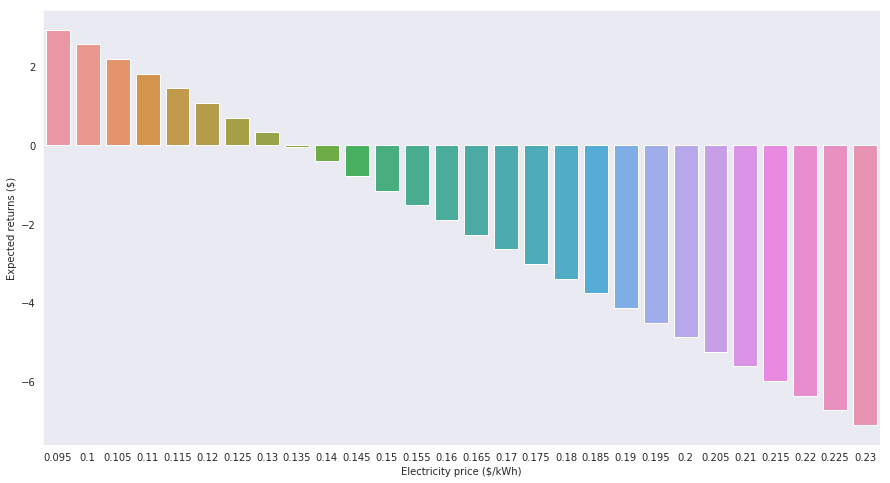

In [125]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.set(xlabel='Electricity price ($/kWh)', ylabel='Expected returns ($)')
sns.barplot(data=df, y=projected_returns, x=electricity_costs)